In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import constants as const


In [20]:
def M_total(m0, k, r):
    return (m0 + k*r)

def speed():
    v = (const.G*(k + m0/r))**0.5
    return v


Carroll and Ostlie Exercise 24.36:

24.36) Assume that a black hole of mass $3.7\times 10^6 \odot$ is located at the centre of the galaxy and the remainder of the galactic mass has an isothermal density distribution $\rho(r) \propto r^{-2}$.

a) Show that is the mass distribution is spherically symmetric, the mass interior to a radius r can be expressed as a function of the form: $M_r = kr + M_0$.

a) Solution:

We know that the galaxy total mass consists of the black hole at its centre and the remaining disk with a density distribution of $\rho(r) \propto r^{-2}$.

$M_{total} = M_0 + M(\rho(r)) \rightarrow $ need to prove $M(\rho(r)) = kr$.

Finding $M(\rho(r))$:

$$ M(\rho(r)) = \int_0^r \int_0^{\pi} \int_0^{2\pi} \rho(r') r'^2 sin(\theta) dr d\theta d\phi
              = 4\pi \int_0^r \frac{Cr'^2}{r'^2} dr'
              = 4\pi Cr $$, where C is a proportionality constant.
We can absorb $4\pi C$ into k, since they are all constants, to obtain $M(\rho(r)) = kr$
Putting it all together, $M_{total} = M_0 + kr$

b) Assuming perfectly circular motion and Newtonian gravity, show the orbital velocity curve is given by $$v=\big[ G(k + \cfrac{M_0}{r}) \big]^{1/2}$$

b) Solution: 

In the orbital velocity curve path, centripetal acceleration = gravitational acceleration (we can make the simplifying assumption that the particle isn't spiraling in towards the centre or flying off into space).

Centripetal acceleration is given by $\cfrac{v^2}{r}$, gravitational acceleration is given by $F_{gravity}/m = \bigg( \frac{GMm}{r^2}\bigg)/m = \cfrac{GM}{r^2}$.

$\cfrac{v^2}{r} = \cfrac{GM}{r^2} \rightarrow v=\big[c\frac{GM}{r}\big]^{1/2} = \big[\cfrac{G(M_0 + kr)}{r}\big]^{1/2}$, by substituting the total mass M as $M_0 + kr$.


In [4]:
#Practice Problem part c (manual units)
v = 1.1e5  #convert to m/s
M0 = 3.7e6*(2.0e30)  #convert to kg
r = 2.0*(3.086e16)  #convert to metres
G = 6.674e-11

#Re-arranging the equation we got in part b: k = (v^2)/G - M_0/r
k1 = (v**2)/G - (M0/r)
print(k1)


6.140426347608687e+19


In [15]:
#Part C with astropy
v = (110.0*(u.km/u.s)).to(u.m/u.s)
M0 = (3.7e6*const.M_sun).to(u.kg)
r = (2.0*u.pc).to(u.m)
G = const.G

#Re-arranging the equation we got in part b: k = (v^2)/G - M_0/r
k2 = (v**2)/G - (M0/r)
print(k2)


6.2078465913022824e+19 kg / m


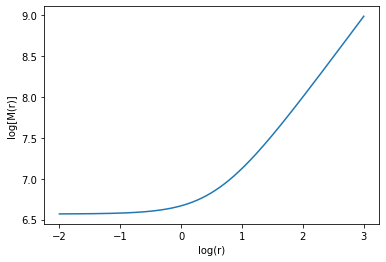

In [23]:
#Part D
log_r = np.logspace(-2, 3, 200)  #10^[-2,3,200]
k2b = (k2.to(u.kg/u.pc))/(const.M_sun)
M = (k2b.value)*log_r + (M0/const.M_sun).value  #M_total((M0/const.M_sun).value, k2b.value, log_r)

plt.figure()
plt.plot(np.log10(log_r), np.log10(M))
plt.xlabel('log(r)')
plt.ylabel('log[M(r)]')
plt.show()


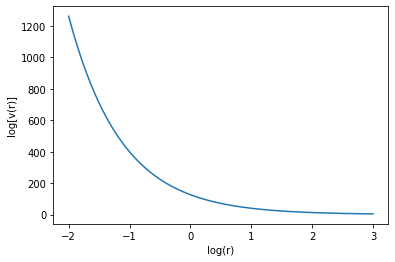

In [7]:
#Part E

v = (G.value*(M0.value/(log_r*(u.pc).to(u.m)) + k2.value))**0.5

plt.figure()
plt.plot(np.log10(log_r), v*((u.m).to(u.km)))
plt.xlabel('log(r)')
plt.ylabel('log[v(r)]')
plt.show()


Now, can we physically explain why this is the case?  What will happen if we want to look at how other parameters vary?

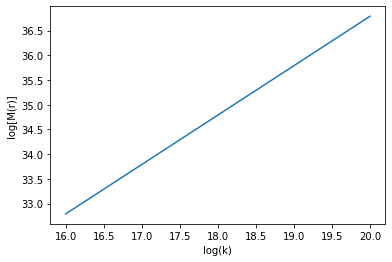

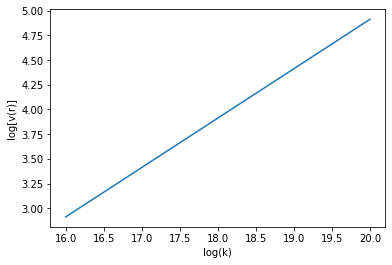

In [10]:
#Varying Other Parameters

#k:
k_var = np.logspace(16.0, 20.0, 100)
M = (k_var)*r.value + (M0/const.M_sun).value
plt.figure()
plt.plot(np.log10(k_var), np.log10(M))
plt.xlabel('log(k)')
plt.ylabel('log[M(r)]')
plt.show()

#speed v vs. k:
v = (G.value*(M0.value/(r*(u.pc).to(u.m)).value + k_var))**0.5
plt.figure()
plt.plot(np.log10(k_var), np.log10(v))
plt.xlabel('log(k)')
plt.ylabel('log[v(r)]')
plt.show()


In [9]:
#Example numerical integral - probably skip this

def midpoint(f, xmax, xmin, n, init_value):
    integral = init_value
    x_diff = (xmax-xmin)/n
    x_i = xmin
    for i in range(n):
        x2 = x_i+x_diff
        curr = f(0.5*(x2+x_diff))
        integral += curr
    return integral
 